<a href="https://colab.research.google.com/github/snehaleela/OLX_Assignment/blob/master/Genes_and_Geography_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Data and Software


In [ ]:
! ls

matrix.csv  sample_data


In [1]:
!pip install pysam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 6.0 MB/s 


In [14]:
!wget http://hgdownload.cse.ucsc.edu/gbdb/hg19/1000Genomes/ALL.chr22.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz

--2022-10-26 14:43:41--  http://hgdownload.cse.ucsc.edu/gbdb/hg19/1000Genomes/ALL.chr22.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1905703992 (1.8G) [application/x-gzip]
Saving to: ‘ALL.chr22.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz’

ALL.chr22.integrate 100%[===================>]   1.77G   116MB/s    in 17s     

2022-10-26 14:43:58 (106 MB/s) - ‘ALL.chr22.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz’ saved [1905703992/1905703992]



In [5]:
import pysam

In [15]:
vcf_filename = '/content/ALL.chr22.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz'

In [7]:
from pysam import VariantFile

In [16]:
VariantFile(vcf_filename)

In [19]:
with VariantFile(vcf_filename) as vcf_reader:
    counter = 0 
    for record in vcf_reader:
        counter += 1 
        if counter < 5 :
          print(record)
        else : break


22	16050408	rs149201999	T	C	100	PASS	LDAF=0.0649;RSQ=0.8652;AN=2184;ERATE=0.0046;VT=SNP;AA=.;AVGPOST=0.9799;THETA=0.0149;SNPSOURCE=LOWCOV;AC=134;AF=0.06;ASN_AF=0.04;AMR_AF=0.05;AFR_AF=0.1;EUR_AF=0.06	GT:DS:GL	0|0:0.05:-0.03,-1.17,-5	0|1:0.9:-0.71,-0.09,-5	0|1:1:-4.1,-0,-3.28	0|0:0.05:-0.11,-0.67,-3.92	0|1:0.95:-0.19,-0.45,-2.15	0|1:0.55:-0.08,-0.79,-5	0|0:0:-0,-3.55,-5	0|0:0.1:-0,-2.37,-5	0|0:0.05:-0.03,-1.25,-5	0|0:0:-0.03,-1.17,-5	0|1:1:-2.41,-0.01,-1.52	0|0:0.15:-0.11,-0.66,-4.22	0|0:0:-0,-1.97,-5	0|0:0:-0,-3.66,-5	0|1:1:-5,0,-5	0|0:0:-0.03,-1.2,-5	0|0:0.05:-0.03,-1.16,-5	0|0:0.05:-0.03,-1.15,-5	0|0:0:-0.01,-1.54,-5	0|0:0:-0,-3.3,-5	0|0:0.35:-1.35,-0.02,-3.08	0|1:1.05:-4.7,-0.05,-0.97	0|0:0:-0.06,-0.87,-5	0|0:0:-0,-4.7,-5	0|0:0:-0.01,-1.76,-5	0|0:0:-0.02,-1.42,-5	0|0:0:-0.01,-1.68,-5	0|0:0:-0.03,-1.21,-5	0|1:1:-5,0,-5	0|1:1:-1.51,-0.01,-4.7	0|1:1:-3.42,-0,-5	0|0:0:-0.03,-1.14,-5	0|0:0:-0,-1.95,-5	0|1:1:-1.33,-0.02,-5	0|1:1:-4.22,-0,-3.49	0|0:0:-0,-2.28,-5	0|0:0:-0.1,-0.69,-4	0|0:0:-

PANEL DATA - SampleID - Population Code - Source

In [8]:
!wget ftp://ftp-trace.ncbi.nih.gov/1000genomes/ftp/release/20110521/phase1_integrated_calls.20101123.ALL.panel

--2022-10-26 14:36:22--  ftp://ftp-trace.ncbi.nih.gov/1000genomes/ftp/release/20110521/phase1_integrated_calls.20101123.ALL.panel
           => ‘phase1_integrated_calls.20101123.ALL.panel’
Resolving ftp-trace.ncbi.nih.gov (ftp-trace.ncbi.nih.gov)... 165.112.9.230, 130.14.250.7, 2607:f220:41e:250::10, ...
Connecting to ftp-trace.ncbi.nih.gov (ftp-trace.ncbi.nih.gov)|165.112.9.230|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /1000genomes/ftp/release/20110521 ... done.
==> SIZE phase1_integrated_calls.20101123.ALL.panel ... 29939
==> PASV ... done.    ==> RETR phase1_integrated_calls.20101123.ALL.panel ... done.
Length: 29939 (29K) (unauthoritative)

phase1_integrated_c 100%[===================>]  29.24K  --.-KB/s    in 0.09s   

2022-10-26 14:36:23 (326 KB/s) - ‘phase1_integrated_calls.20101123.ALL.panel’ saved [29939]



In [10]:
panel_filename = '/content/phase1_integrated_calls.20101123.ALL.panel'

In [13]:
with open(panel_filename) as panel_file:
    labels = {} # {sample_id: population_code}
    for line in panel_file:
        #print(line)
        line = line.strip().split('\t')
        labels[line[0]] = line[1]
    print(labels)

{'HG00096': 'GBR', 'HG00097': 'GBR', 'HG00099': 'GBR', 'HG00100': 'GBR', 'HG00101': 'GBR', 'HG00102': 'GBR', 'HG00103': 'GBR', 'HG00104': 'GBR', 'HG00106': 'GBR', 'HG00108': 'GBR', 'HG00109': 'GBR', 'HG00110': 'GBR', 'HG00111': 'GBR', 'HG00112': 'GBR', 'HG00113': 'GBR', 'HG00114': 'GBR', 'HG00116': 'GBR', 'HG00117': 'GBR', 'HG00118': 'GBR', 'HG00119': 'GBR', 'HG00120': 'GBR', 'HG00121': 'GBR', 'HG00122': 'GBR', 'HG00123': 'GBR', 'HG00124': 'GBR', 'HG00125': 'GBR', 'HG00126': 'GBR', 'HG00127': 'GBR', 'HG00128': 'GBR', 'HG00129': 'GBR', 'HG00130': 'GBR', 'HG00131': 'GBR', 'HG00133': 'GBR', 'HG00134': 'GBR', 'HG00135': 'GBR', 'HG00136': 'GBR', 'HG00137': 'GBR', 'HG00138': 'GBR', 'HG00139': 'GBR', 'HG00140': 'GBR', 'HG00141': 'GBR', 'HG00142': 'GBR', 'HG00143': 'GBR', 'HG00146': 'GBR', 'HG00148': 'GBR', 'HG00149': 'GBR', 'HG00150': 'GBR', 'HG00151': 'GBR', 'HG00152': 'GBR', 'HG00154': 'GBR', 'HG00155': 'GBR', 'HG00156': 'GBR', 'HG00158': 'GBR', 'HG00159': 'GBR', 'HG00160': 'GBR', 'HG00171'

In [ ]:
import pandas as pd
from sklearn import decomposition 

#Reading Data and Producing Matrices

In [ ]:
df = pd.read_csv('matrix.csv')
df

,Unnamed: 0,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,rs191445992,rs192467387,rs117873986,rs131556,rs12158807,rs147991245,rs191939299,rs182384033,rs183445157,rs188681520,rs193079751,rs140483857,rs188051002,rs118158488,rs187221516,rs184340529,rs138404631,rs11089243,rs188019254,rs141440063,Unnamed: 30,rs7288876,rs117357846,rs9606008,rs147196557,rs146805961,rs2096539,rs183421549,rs8142777,rs188283983,...,rs6010135,rs201381452,rs113802488,rs7284426,rs9616866,rs77135372,rs138079423,rs11913340,rs144175669,rs9628215,rs141837905,rs963980,rs145479865,rs189949730,rs139026351,rs112222696,rs76038028,rs6151414,rs115513093,rs188724627,rs183947955,rs113971957,rs140536695,rs191553223,rs140214489,rs114849024,rs114294635,rs144474945,rs150111605,rs147260888,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TSI


In [ ]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
df

,Sample,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,rs191445992,rs192467387,rs117873986,rs131556,rs12158807,rs147991245,rs191939299,rs182384033,rs183445157,rs188681520,rs193079751,rs140483857,rs188051002,rs118158488,rs187221516,rs184340529,rs138404631,rs11089243,rs188019254,rs141440063,Unnamed: 30,rs7288876,rs117357846,rs9606008,rs147196557,rs146805961,rs2096539,rs183421549,rs8142777,rs188283983,...,rs6010135,rs201381452,rs113802488,rs7284426,rs9616866,rs77135372,rs138079423,rs11913340,rs144175669,rs9628215,rs141837905,rs963980,rs145479865,rs189949730,rs139026351,rs112222696,rs76038028,rs6151414,rs115513093,rs188724627,rs183947955,rs113971957,rs140536695,rs191553223,rs140214489,rs114849024,rs114294635,rs144474945,rs150111605,rs147260888,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TSI


In [ ]:
non_snp_columns = ['Population code', 'Sample']

In [ ]:
df_snps = df.drop(non_snp_columns, axis=1)
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix

(1092, 4943)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

#Running PCA and Plotting

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08253525 0.05412034]
[188.93732058 152.99536559]


In [ ]:
to_plot = pca.transform(matrix)
to_plot.shape

(1092, 2)

In [ ]:
import matplotlib.pyplot as plt

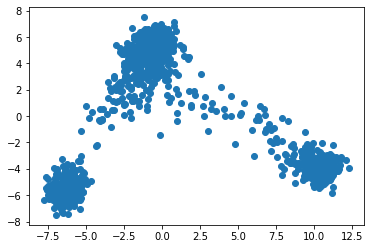

In [ ]:
plt.scatter(x=to_plot[:, 0], y=to_plot[:, 1])

In [ ]:
import altair as alt 

In [ ]:
df_plot = df[non_snp_columns].copy()
df_plot

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [ ]:
df_plot['PC1'] = to_plot[:, 0]
df_plot['PC2'] = to_plot[:, 1]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,0.312827,5.354349
1,GBR,HG00097,-0.679403,6.183329
2,GBR,HG00099,-0.420710,5.266720
3,GBR,HG00100,-0.805419,5.965095
4,GBR,HG00101,-0.771385,4.332076
...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230
1088,TSI,NA20818,-1.226520,6.273754
1089,TSI,NA20819,0.200440,4.437550
1090,TSI,NA20826,0.119733,4.959937


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

#Combining Matrix Data with Population Data

In [ ]:
pop = pd.read_csv('igsr_populations.tsv', sep='\t')
pop

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.133330,113.266667,EAS,East Asian Ancestry,#778500,3,171,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,FIN,FIN,Finnish,Finnish in Finland,60.170000,24.930000,EUR,European Ancestry,#018ead,4,105,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,PUR,PUR,Puerto Rican,Puerto Rican in Puerto Rico,18.400000,-66.100000,AMR,American Ancestry,#710027,2,150,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.780000,106.680000,EAS,East Asian Ancestry,#778500,3,124,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,ACB,ACB,African Caribbean,African Caribbean in Barbados,13.100000,-59.620000,AFR,African Ancestry,#ffd845,1,123,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,EstonianSGDP,Estonian,Estonian in Estonia (SGDP),58.500000,24.900000,NaN,West Eurasia (SGDP),#001f54,19,2,Simons Genome Diversity Project
208,NaN,SardinianSGDP,Sardinian,Sardinian in Italy (SGDP),40.000000,9.000000,NaN,West Eurasia (SGDP),#001f54,19,3,Simons Genome Diversity Project
209,NaN,DinkaSGDP,Dinka,Dinka in Sudan (SGDP),8.794444,27.400000,NaN,Africa (SGDP),#12eeff,13,3,Simons Genome Diversity Project
210,NaN,NaxiSGDP,Naxi,Naxi in China (SGDP),26.000000,100.000000,NaN,East Asia (SGDP),#ff48de,16,3,Simons Genome Diversity Project


In [ ]:
df_plot = df_plot.merge(pop, on='Population code', how='inner')
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1088,TSI,NA20818,-1.226520,6.273754,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
    fill='Population code'
)

alt.Chart(...)

#Running tSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X = matrix 
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)
X_embedded.shape  

(1092, 2)

In [ ]:
df_plot['tsne1'] = X_embedded[:,0]
df_plot['tsne2'] = X_embedded[:,1]

In [ ]:
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections,tsne1,tsne2
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-1.668921,22.802174
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-0.237526,18.817564
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-5.782549,15.903204
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",1.841071,20.135218
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-1.016888,19.220268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",2.281152,15.852478
1088,TSI,NA20818,-1.226520,6.273754,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",0.581434,16.590088
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",4.059751,16.091049
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",3.392308,20.495281


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
)

alt.Chart(...)

In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20')),
)

alt.Chart(...)